### 1. 라이브러리 설치

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 2. 모집단추출

In [2]:
# 모집단(population) 설정

In [3]:
data = pd.read_csv("./bloodsugar.csv")

In [4]:
data.head()

,Unnamed: 0,id,memb_id,get_time,device_id,bls_value,tag1,tag2,tag3,device_serial,create_dttm
0,0,11,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-08-30 21:53:18,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,145,9,0,NaN,B0:4A:6A:C3:4E:CC,2023-10-18 04:34:39.446448
1,1,12,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-08-31 06:15:02,5c46d4b4-ceaa-43a3-9d79-3e2360eec29c,229,2,0,닭복음,EC:49:97:03:AB:CF,2023-10-18 04:34:39.446448
2,2,13,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-08-31 23:09:23,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,132,0,0,NaN,B0:4A:6A:C3:4E:CC,2023-10-18 04:34:39.446448
3,3,14,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-09-01 03:18:52,5c46d4b4-ceaa-43a3-9d79-3e2360eec29c,114,5,0,NaN,EC:49:97:03:AB:CF,2023-10-18 04:34:39.446448
4,4,15,52a62c11-7c4f-4912-91c9-ff5c145328cd,2023-09-01 03:18:42,d7acb805-d4c7-4bb0-bea7-cf9db83efe81,121,5,0,NaN,AC:4D:16:41:99:0C,2023-10-18 04:34:39.446448


In [5]:
data["tag1"].unique()

array([9, 2, 0, 5, 3, 4, 6, 7, 8, 1], dtype=int64)

In [6]:
# 데이터 전처리

In [7]:
data = data.drop(columns=['Unnamed: 0'], inplace=False)

In [8]:
data['get_time'] = pd.to_datetime(data['get_time'])

In [9]:
data.dtypes

id                        int64
memb_id                  object
get_time         datetime64[ns]
device_id                object
bls_value                 int64
tag1                      int64
tag2                      int64
tag3                     object
device_serial            object
create_dttm              object
dtype: object

In [10]:
# 표본(sample) 크기 설정

In [11]:
sample_size = 100

In [12]:
# 표본 추출(Random)

In [13]:
sample = data.sample(n=sample_size)

In [19]:
sample.dtypes

id                        int64
memb_id                  object
get_time         datetime64[ns]
device_id                object
bls_value                 int64
tag1                      int64
tag2                      int64
tag3                     object
device_serial            object
create_dttm              object
dtype: object

### 3. 기술통계

In [20]:
sample.describe()

,id,get_time,bls_value,tag1,tag2
count,100.000000,100,100.000000,100.000000,100.0
mean,309.360000,2023-08-02 20:40:56.639999744,128.710000,2.120000,0.0
min,12.000000,2023-04-11 11:04:55,78.000000,0.000000,0.0
25%,148.750000,2023-06-05 16:29:40.750000128,115.750000,0.000000,0.0
50%,250.500000,2023-07-23 22:11:49.500000,125.500000,1.500000,0.0
75%,342.500000,2023-09-02 05:32:17.750000128,137.250000,4.000000,0.0
max,837.000000,2023-12-20 23:48:12,229.000000,9.000000,0.0
std,239.576964,NaN,23.772191,2.507685,0.0


In [21]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

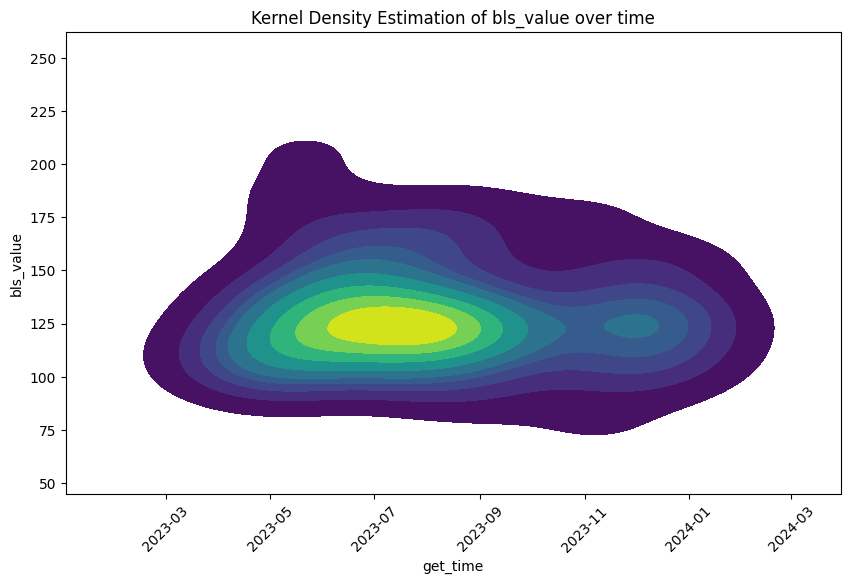

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sample, x='get_time', y='bls_value', cmap='viridis', fill=True)
plt.title('Kernel Density Estimation of bls_value over time')
plt.xlabel('get_time')
plt.ylabel('bls_value')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [38]:
sample.dtypes

id                int64
memb_id          object
get_time         object
device_id        object
bls_value         int64
tag1              int64
tag2              int64
tag3             object
device_serial    object
create_dttm      object
dtype: object

### 4. 추론통계

In [31]:
# 가상의 혈당 데이터 생성
np.random.seed(42)  # 시드 설정을 통해 재현성 확보
data1 = pd.DataFrame({
    'morning': np.random.normal(loc=120, scale=10, size=50),  # 아침 혈당
    'evening': np.random.normal(loc=130, scale=15, size=50)   # 저녁 혈당
})

In [35]:
data.head()

,morning,evening
0,124.967142,134.861260
1,118.617357,124.223766
2,126.476885,119.846170
3,135.230299,139.175144
4,117.658466,145.464993


In [32]:
# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(data['morning'], data['evening'])
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("두 그룹 간의 혈당 수준에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("두 그룹 간의 혈당 수준에는 통계적으로 유의한 차이가 없습니다.")


T-Statistic: -5.4997664919141105, P-Value: 3.0303503261375475e-07
두 그룹 간의 혈당 수준에는 통계적으로 유의한 차이가 있습니다.


In [33]:
# 상관 분석 수행
correlation = data['morning'].corr(data['evening'])
print(f"상관 계수: {correlation}")

# 결과 해석
if abs(correlation) >= 0.7:
    print("아침과 저녁 혈당 간에 강한 양의 선형 관계가 있습니다.")
elif 0.5 <= abs(correlation) < 0.7:
    print("아침과 저녁 혈당 간에 중간 정도의 양의 선형 관계가 있습니다.")
else:
    print("아침과 저녁 혈당 간에는 선형 관계가 적거나 없습니다.")


상관 계수: 0.1100717853401607
아침과 저녁 혈당 간에는 선형 관계가 적거나 없습니다.
